#LATAR BELAKANG
Sebuah PerusahaanSaaS (Software as a Service) ingin mengetahui performa bisnis perusahaanya. Perusahaan melakukan pengumpulan data dari 2020 sampai dengan 2023 untuk mengukur kinerja bisnis, menemukan tren, dan membuat keputusan strategis yang tepat. Data yang dianalisis mencakup informasi penjualan, profit, diskon, dan berbagai atribut lainnya seperti wilayah, pelanggan, dan produk. Dengan menganalisis data ini, perusahaan dapat mengidentifikasi area yang berkinerja baik, menemukan peluang pertumbuhan, dan mengatasi masalah yang ada untuk meningkatkan efisiensi dan profitabilitas.

##Pernyataan Masalah
Perusahaan ingin memahami faktor-faktor yang paling signifikan mempengaruhi profitabilitas dan bagaimana kinerja penjualan tersebar di berbagai wilayah dan segmen pelanggan. Secara spesifik, mereka ingin menjawab pertanyaan-pertanyaan berikut:
* Bagaimana tren penjualan dan keuntungan dari waktu ke waktu?
* Produk mana yang paling banyak terjual dan paling menguntungkan?
* Wilayah (Region) dan subwilayah (Subregion) mana yang memberikan kontribusi penjualan dan keuntungan terbesar?
* Segmen dan Industri pelanggan mana yang paling menguntungkan?
* Bagaimana hubungan antara diskon yang diberikan dengan penjualan dan keuntungan?
* Top 10 Customer yang mememberikan kontribusi keuntungan terbesar?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import kstest
from scipy.stats import kruskal

Data ini berisi tentang informasi terkait kinerja penjualan pada perusahaan SaaS.  Ada 19 kolom di dalam dataset SaaS-Sales, yaitu:
Row ID	: ID unik untuk setiap transaksi.

1. Row ID	: ID unik untuk setiap transaksi
2. Order ID	: ID unik untuk setiap pesanan.
3. Order Date : Tanggal saat pesanan dilakukan.
4. Date Key : Representasi numerik dari tanggal pesanan (YYYYMMDD).
5. Contact Name : Nama orang yang melakukan pemesanan.
6. Country	: Negara tempat pesanan dilakukan.
7. City	: Kota tempat pemesanan dilakukan.
8.	Region : Wilayah tempat pemesanan dilakukan.
9.	Subregion : Subwilayah tempat pemesanan dilakukan.
10.	Customer: Nama perusahaan yang melakukan pemesanan.
11.	Customer ID	: ID unik untuk setiap pelanggan.
12.	Industry	: Industri tempat pelanggan berada.
13.	Segment : Segmen pelanggan (UMKM, Strategis, Enterprise, dll).
14.	Product	: Produk yang dipesan.
15.	License	:  Kunci lisensi untuk produk.
16.	Sales : Jumlah total penjualan untuk transaksi.
17.	Quantity	: Jumlah total item dalam transaksi.
18.	Discount : Diskon yang berlaku pada transaksi.
19.	Profit : Keuntungan dari transaksi.

Berikut tampilan Dataset SaaS-Sales :

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data= '/content/drive/MyDrive'

In [ ]:
df= pd.read_csv(f'{data}/SaaS-Sales.csv')
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


#Data Understanding and Data Cleaning
Sebelum menganalisis lebih lanjut terkait dataset, tahapan pertama yang harus dilakukan adalah memahami dataset atau Data Understanding. Kita perlu mendapatkan gambaran menyeluruh tentang data yang kita miliki. Tujuannya untuk memahami struktur, isi, dan kualitas data. Dalam proses ini kita dapat mengetahui apakah data yang kita memiliki terdapaat data yang ambigu yang menyebabkan sumber anomali data atau anomali sebagai penyebab ambiguitas dan lain sebagainnya. Keduanya menunjukkan masalah kualitas data yang perlu ditangani melalui proses data cleaning

Mari kita liat informasi terkait dataset yang kita miliki

In [ ]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      99

 Berdasarkan informasi data di atas terdapat kesalahan interpretasi data dari beberpaa kolom. Berikut Kolomnya:
1. Row ID : Berdasarkan data di atas bahwa kolom ini bertipe *integer* yang seharusnya *string* karena kolom ini menujukkan ID unik untuk setiap transaksi bukan suatu bilangan numerik
2. Order Date : Berdasarkan data di atas bahwa kolom ini bertipe *object* yang seharusnya bertipe *string* karena kolom ini menjukkan Tanggal saat pesanan dilakukan bukan suatu objek
3. Customer ID : Berdasarkan data di atas bahwa kolom ini bertipe *integer* yang seharusnya *string* karena kolom ini menujukkan ID unik untuk setiap customer bukan suatu bilangan numerik

maka kolom tersebut harus diubah tipe datanya.

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Row ID']= df['Row ID'].astype(str)
df['Customer ID']= df['Customer ID'].astype(str)

In [ ]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   object        
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   object        
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   obj

Bisa dilihat bahwa tipe data sudah sesuai.

In [ ]:
df.describe(include= 'all')

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9.994000e+03,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,9994,5009,NaN,NaN,793,48,262,3,12,99,99,10,3,14,9994,NaN,NaN,NaN,NaN
top,9994,EMEA-2023-100111,NaN,NaN,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,1080,Finance,SMB,ContactMatcher,3NTBV9B3PS,NaN,NaN,NaN,NaN
freq,1,14,NaN,NaN,37,2001,922,4219,2507,192,192,2127,5191,1842,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,2022-05-01 00:07:12.259355648,2.021803e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
min,NaN,NaN,2020-01-04 00:00:00,2.020010e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,2021-05-23 00:00:00,2.021052e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,2022-06-27 00:00:00,2.022063e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,2023-05-15 00:00:00,2.023052e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000
max,NaN,NaN,2023-12-31 00:00:00,2.023123e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,8399.976000


Kita harus memeriksa apakah ada duplikat data data dataset yang diterima

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
pd.set_option('display.max_colwidth',None)
column_uniqe = []
for column in df.columns:
    #print(df[column].unique())
    column_uniqe.append(df[column].unique())
pd.DataFrame(
    {'Column Name' : df.columns,
     'Unique Value' : column_uniqe}
)

,Column Name,Unique Value
0,Row ID,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 2021-10-11 00:00:00, 2020-06-09 00:00:00, 2023-04-16 00:00:00, 2022-12-06 00:00:00, 2021-11-22 00:00:00, 2020-11-11 00:00:00, 2020-05-13 00:00:00, 2020-08-27 00:00:00, 2022-12-10 00:00:00, 2023-07-17 00:00:00, 2021-09-25 00:00:00, 2022-01-16 00:00:00, 2021-09-17 00:00:00, 2023-10-20 00:00:00, 2022-12-09 00:00:00, 2021-12-27 00:00:00, 2023-09-11 00:00:00, 2022-07-18 00:00:00, 2023-09-20 00:00:00, 2022-03-12 00:00:00, 2020-10-20 00:00:00, 2022-06-21 00:00:00, 2021-04-18 00:00:00, 2022-12-12 00:00:00, 2022-06-18 00:00:00, 2021-11-24 00:00:00, 2021-04-30 00:00:00, 2020-12-05 00:00:00, 2022-06-05 00:00:00, 2022-09-19 00:00:00, 2023-09-15 00:00:00, 2021-04-26 00:00:00, 2023-12-10 00:00:00, 2020-11-26 00:00:00, 2020-10-12 00:00:00, 2021-09-03 00:00:00, 2023-11-14 00:00:00, 2023-05-29 00:00:00, 2023-10-27 00:00:00, 2022-04-06 00:00:00, 2022-09-18 00:00:00, 2021-01-31 00:00:00, 2023-11-07 00:00:00, 2023-11-10 00:00:00, 2023-06-18 00:00:00, 2022-09-07 00:00:00, 2022-08-30 00:00:00, 2022-12-02 00:00:00, 2021-11-13 00:00:00, 2023-11-24 00:00:00, 2021-10-15 00:00:00, 2023-12-26 00:00:00, 2022-11-04 00:00:00, 2020-08-25 00:00:00, 2021-03-02 00:00:00, 2021-04-05 00:00:00, 2020-12-26 00:00:00, 2020-09-20 00:00:00, 2023-11-06 00:00:00, 2022-11-07 00:00:00, 2023-02-03 00:00:00, 2022-10-14 00:00:00, 2022-09-06 00:00:00, 2023-09-19 00:00:00, 2023-12-23 00:00:00, 2021-09-07 00:00:00, 2020-10-22 00:00:00, 2022-03-14 00:00:00, 2021-05-31 00:00:00, 2021-05-28 00:00:00, 2020-03-01 00:00:00, 2022-11-21 00:00:00, 2022-05-12 00:00:00, 2021-12-28 00:00:00, 2022-11-17 00:00:00, 2022-11-08 00:00:00, 2020-09-08 00:00:00, 2020-08-05 00:00:00, 2020-09-14 00:00:00, 2023-04-22 00:00:00, 2021-11-21 00:00:00, 2021-12-15 00

Secara garis besar, informasi yang terdapat pada dataset ini sebagai berikut:
1. Data set ini memilikin 19 kolom dan 9994 baris
2. Terdapat 3 kolom yang mengalami kesalahan tipe data yaitu Row ID yang merupakan* integer* yang seharusnya *string*, Order Date yang merupakan object yang seharus *datetime* dan Customer ID yang merupakan* integer* yang seharusnya *string*
3. Tidak adanya Data yang kosong pada dataset ini
4. Ada data yang menunjukkan tentang waktu, bisa dibuatkan kolom baru berdasarkan tahun dan bulannya untuk memudahkan analisis
5. Terdapat kolom Row ID yang merupakan ID unik untuk setiap transaksi, sehingga tidak relevan dalam analisis dan bisa dihapus saja.
6. Terdapat kolom Date Key yang merupakan Representasi numerik dari tanggal pesanan (YYYYMMDD), sehingga tidak relevan dalam analisis dan bisa dihapus saja.
7. Terdapat kolom License yang merupakan Kunci lisensi untuk produk, sehingga tidak relevan dalam analisis dan bisa dihapus saja.


## Missing Value

In [ ]:
# Memeriksa dan menampilkan jumlah missing values per kolom
missing_values = df.isnull().sum()
print("Jumlah missing values per kolom:")
print(missing_values)

Jumlah missing values per kolom:
Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


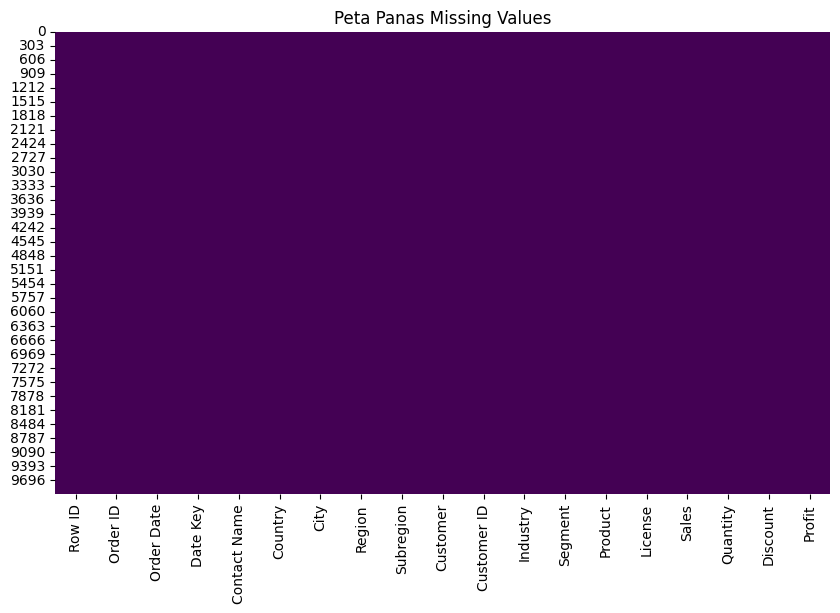

In [ ]:
# Menampilkan ringkasan visual missing values
plt.figure(figsize=(10, 6))
sb.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Peta Panas Missing Values')
plt.show()

In [ ]:
# Menampilkan bar chart missing values
missing_data_df = pd.DataFrame({'column': missing_values.index, 'count': missing_values.values})
missing_data_df = missing_data_df[missing_data_df['count'] > 0] # Filter kolom dengan missing values
if not missing_data_df.empty:
    plt.figure(figsize=(12, 7))
    sns.barplot(x='column', y='count', data=missing_data_df)
    plt.xticks(rotation=45, ha='right')
    plt.title('Jumlah Missing Values per Kolom')
    plt.xlabel('Kolom')
    plt.ylabel('Jumlah Missing Values')
    plt.tight_layout()
    plt.show()
else:
    print("\nTidak ada missing values yang ditemukan dalam dataset.")


Tidak ada missing values yang ditemukan dalam dataset.


## Menghapus kolom Row ID, Date Key, dan License
Ketiga data ini tidak mempengaruhi analisis yang akan dilakukan maka sebaiknya dihapus saja.

In [ ]:
df.drop(columns=['Row ID','Date Key', 'License'],inplace=True)

## Periksa Data yang sudah Bersih

In [ ]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

final = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
final

,dataFeatures,dataType,null,unique,uniqueSample
0,Order ID,object,0,5009,"[EMEA-2021-122910, AMER-2022-146766]"
1,Order Date,datetime64[ns],0,1237,"[2020-01-29T00:00:00.000000000, 2021-05-14T00:00:00.000000000]"
2,Contact Name,object,0,793,"[Edward Wilkins, Harry McLean]"
3,Country,object,0,48,"[France, Philippines]"
4,City,object,0,262,"[Thessaloniki, Manila]"
5,Region,object,0,3,"[APJ, AMER]"
6,Subregion,object,0,12,"[JAPN, UKIR]"
7,Customer,object,0,99,"[News Corp., Phillips 66]"
8,Customer ID,object,0,99,"[1003, 1029]"
9,Industry,object,0,10,"[Misc, Consumer Products]"


Setelah dibersihkan kini datasetnya memilik kolom 16 yang mana sebelumnya berjumlah 19.

# Data Analisis
Setelah melakukan tahap data cleaning. Sekarang, kita sudah bisa melakukan analisis data sesuai perumusan masalahnya.  

Analisis akan dilakukan dengan membandingkan keuntungan dan penjualan berdasarkan kategori tertentu dan dari waktu ke waktu.

## Korelasi antar variabel

Diperlakukanya informasi terkait korelasi antar variabel untuk memahami apakah ada hubungan antara dua atau lebih variabel, seberapa kuat hubungan tersebut, dan arah hubungannya, guna membantu dalam pengambilan keputusan, peramalan, dan pengembangan hipotesis untuk penelitian lebih lanjut

In [ ]:
numeric_column_list = []
for column in df:
    if df[column].dtypes != object:
        numeric_column_list.append(column)
numeric_column_list.remove('Order Date')
numeric_column_list

['Sales', 'Quantity', 'Discount', 'Profit']

In [ ]:
numeric_column_list_only = df[numeric_column_list]
numeric_column_list_only

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164
...,...,...,...,...
9989,25.2480,3,0.20,4.1028
9990,91.9600,2,0.00,15.6332
9991,258.5760,2,0.20,19.3932
9992,29.6000,4,0.00,13.3200


In [ ]:
numeric_column_list_only.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


Text(0.5, 1.0, 'Korelasi antar Variabel')

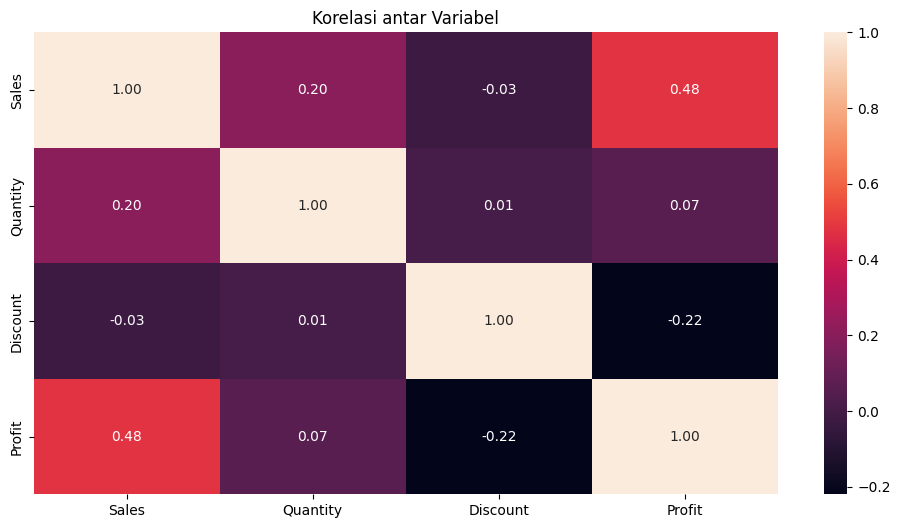

In [ ]:
plt.figure(figsize= (12, 6))

sb.heatmap(
    numeric_column_list_only.corr(),
    annot= True,
    fmt= ".2f"
)

plt.title("Korelasi antar Variabel")

 Untuk membaca peta (heatmap) korelasi variabel, perhatikan nilai koefisien korelasi dan warnanya, yang menunjukkan arah dan kekuatan hubungan. Nilai mendekati +1 berarti korelasi positif kuat (berbanding searah), nilai mendekati -1 berarti korelasi negatif kuat (berbanding berlawanan), dan nilai mendekati 0 berarti tidak ada korelasi.
 Berdasarkan tabel diatas dapat kita ketahui bahwa:
 * Kekuatan korelasi antara profit dan sales adalah **sedang** (0.48)
 * Kekuatan korelasi antara diskon dan sales adalah **sangat rendah** (-0.03)
 * Kekuatan korelasi antara diskon dan sales adalah **sangat rendah** (-0.22)

Perbandingan korelasi anatara variabel profit, sales, dan diskon sangat rendah tapi dibandingkan dengan korelasi antara diskon dan sales,korelasi antara diskon dan profit jauh lebih rendah

## Tren Penjualan dan Keuntungan
Kelompokkan data berdasarkan tahun dan bulan. Untuk menganalisis Pertumbuhan Bisnis berdasarkan Penjualan dan Keuntungan dari waktu ke waktu   




In [ ]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Year,Month
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136,2022,11
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820,2022,11
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714,2022,6
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310,2021,10
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164,2021,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,25.2480,3,0.20,4.1028,2020,1
9990,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,91.9600,2,0.00,15.6332,2023,2
9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,258.5760,2,0.20,19.3932,2023,2
9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,29.6000,4,0.00,13.3200,2023,2


Sebelum menganalisis lebih lanjut sebaiknya test normasilisi dataset perusahaan terlebih dahulu

In [ ]:
from scipy.stats import kstest

In [ ]:
_, p_value_normality = kstest(df.Sales, 'norm')

if p_value_normality > 0.05:
    print("Data berdistribusi normal, maka pengujian yang cocok adalah pengujian parametrik")
else:
    print("Data tidak berdistribusi normal, maka pengujian yang cocok adalah pengujian non-parametrik")

Data tidak berdistribusi normal, maka pengujian yang cocok adalah pengujian non-parametrik


In [ ]:
sales_2021 = df[df.Year == '2021']['Sales']
sales_2022 = df[df.Year == '2022']['Sales']
sales_2023 = df[df.Year == '2023']['Sales']

In [ ]:
#Uji Statistik | Kita ingin membuktikan tidak ada perbedaan jumlah penjualan 2021,2022, dan 2023
# H0: sales_2021 == sales_2022 == sales_2023
# Karena data tidak berdistribusi normal maka dilakukan pengujian non parametrik dan menggunakan metode kruskal karena lebih dari 2 sampel
from scipy.stats import kruskal
_, p_value_kruskal = kruskal(
    sales_2021,
    sales_2022,
    sales_2023
)

if p_value_kruskal > 0.05:
    print("Tidak ada perbedaan rata-rata sales_2021 == sales_2022 == sales_2023")
else:
    print("Ada perbedaan rata-rata sales_2021 == sales_2022 == sales_2023")


Ada perbedaan rata-rata sales_2021 == sales_2022 == sales_2023


/tmp/ipython-input-2006272344.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  _, p_value_kruskal = kruskal(


Kesimpulannya adalah data tidak berdistribusi normal dan menolak HO yang berarti Ada perbedaan rata-rata sales_2021 == sales_2022 == sales_2023

In [ ]:
# Menghitung total Sales dan Profit per Tahun
yearly_trend = df.groupby('Year').agg({ 'Sales': 'sum','Profit': 'sum'}).reset_index()

# Menghitung persentase pertumbuhan tahunan (Year-over-Year Growth)
yearly_trend['Sales YoY Growth'] = yearly_trend['Sales'].pct_change() * 100
yearly_trend['Profit YoY Growth'] = yearly_trend['Profit'].pct_change() * 100
yearly_trend


,Year,Sales,Profit,Sales YoY Growth,Profit YoY Growth
0,2020,484247.4981,49543.9741,NaN,NaN
1,2021,470532.5090,61618.6037,-2.832227,24.371540
2,2022,608473.8300,81726.9308,29.316002,32.633533
3,2023,733947.0232,93507.5131,20.620968,14.414566


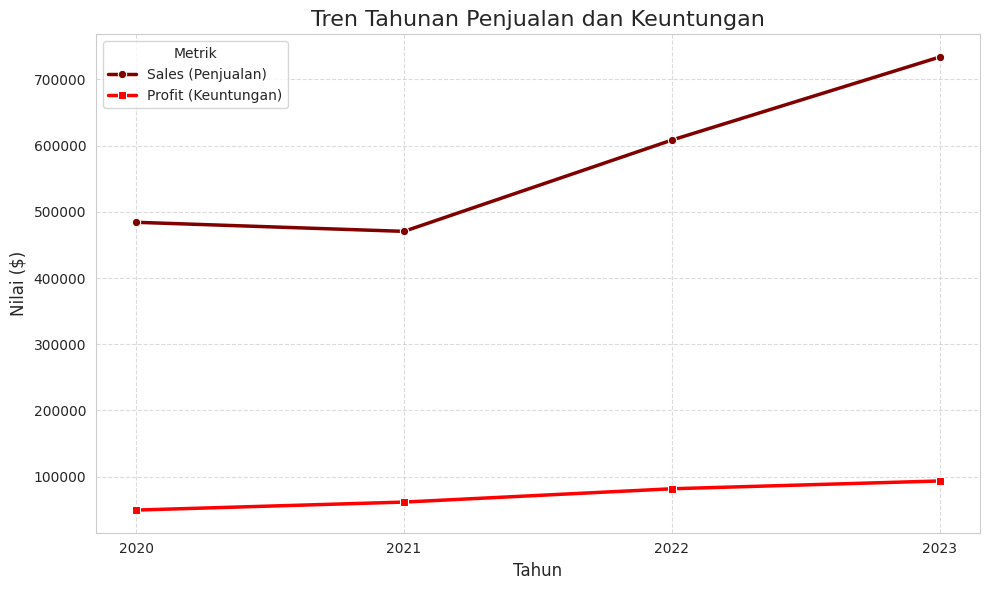

In [ ]:
sb.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sb.lineplot(x='Year', y='Sales', data=yearly_trend , marker='o', label='Sales (Penjualan)', linewidth=2.5, color='maroon')
sb.lineplot(x='Year', y='Profit', data=yearly_trend , marker='s', label='Profit (Keuntungan)', linewidth=2.5, color='red')
plt.title('Tren Tahunan Penjualan dan Keuntungan', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Nilai ($)', fontsize=12)
plt.xticks(yearly_trend ['Year'])
plt.legend(title='Metrik')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str))
monthly_sales = monthly_sales.sort_values('Date')
monthly_sales

,Year,Month,Sales,Date
0,2020,1,13946.2290,2020-01-01
1,2020,2,4810.5580,2020-02-01
2,2020,3,55691.0090,2020-03-01
3,2020,4,28295.3450,2020-04-01
4,2020,5,23648.2870,2020-05-01
5,2020,6,34595.1276,2020-06-01
6,2020,7,33946.3930,2020-07-01
7,2020,8,27909.4685,2020-08-01
8,2020,9,81777.3508,2020-09-01
9,2020,10,31453.3930,2020-10-01


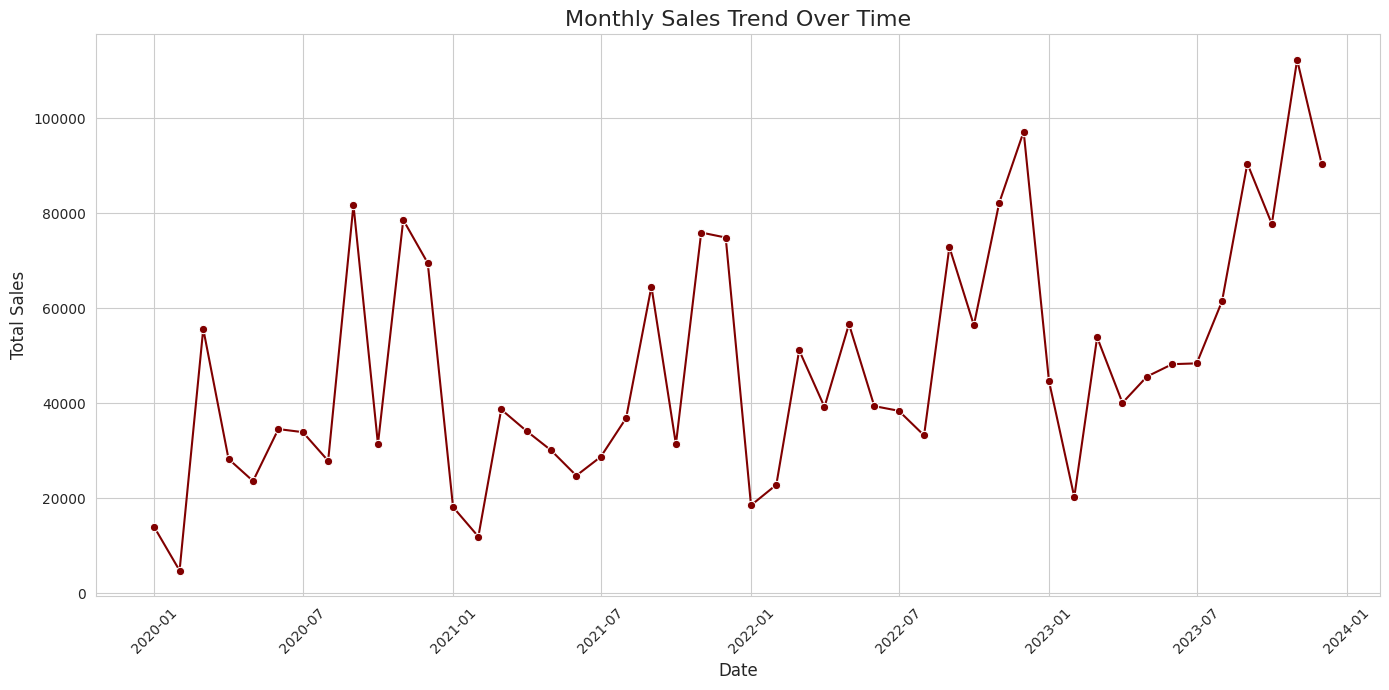

In [ ]:
# Membuat grafik garis untuk visualisasi tren penjualan perbulanan
plt.figure(figsize=(14, 7))
sb.lineplot(x='Date', y='Sales', data=monthly_sales, marker='o', color='maroon')
plt.title('Monthly Sales Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analisa 3 Grafik di atas sebagai berikut:
1. Tren Penjualan Tahunan
Pada grfik tren penjualan terdapat penurunan yang ini tidak terlalu signifikan pada tahun 2020 ke 2021 sebesar-2.83. Ini bisa disebabkan oleh faktor eksternal (misalnya, kondisi pasar) atau perubahan internal dalam strategi pemasaran/penjualan. Penjualan terus bertumbuh pada dari tahun 2021 sampai 2023. Pertumbuhan Penjualan yang signifikan terdapat pada tahun 2021 ke 2022 sebesar 29,3 % dan berlanjut pada tahun 2023.
2. Tren Keuntungan Tahunan
Pada grfik tren keuntungan di ketahui bahwa perusahaan mengalami pertumbuhan keuntungan yang sangat baik dan berkelanjutan
3. Grafik tren penjualan bulanan menunjukkan adanya fluktuasi musiman dalam penjualan. Ada puncak penjualan yang jelas di akhir tahun, terutama pada bulan November dan Desember. Ini mungkin terkait dengan akhir tahun fiskal atau kampanye promosi khusus.


# Tren Keuntungan dan Penjualan Berdasarkan Produk
Kita harus mengetahui produk mana yang berkontribusi memberikan keuntungan yang terbesar dan produk mana yang mengalami penjualan tertinggi serta Produk yang akan lebih difokuskan perusahaan untuk tahun berikutnya

In [ ]:
# Menghitung total Sales dan Profit per Produk
top_products = df.groupby('Product').agg({ 'Sales': 'sum','Profit': 'sum'}).reset_index()
# Hitung Profit Margin (%)
top_products['Profit Margin (%)'] = (top_products ['Profit'] / top_products ['Sales']) * 100
# Urutkan berdasarkan Profit untuk melihat kontributor utama
top_products_sorted = top_products.sort_values(by='Profit', ascending=False)
top_products_sorted


,Product,Sales,Profit,Profit Margin (%)
0,Alchemy,149528.0300,55617.8249,37.195585
11,Site Analytics,330007.0540,44515.7306,13.489327
4,Data Smasher,167380.3180,41936.6357,25.054700
13,Support,125152.7440,32864.4698,26.259488
5,FinanceHub,340935.4150,32136.4203,9.425955
7,Marketing Suite - Gold,223843.6080,21278.8264,9.506113
8,OneView,107532.1610,18138.0054,16.867517
9,SaaS Connector Pack,91705.1640,13059.1436,14.240358
3,ContactMatcher,410378.2650,12496.2822,3.045064
10,SaaS Connector Pack - Gold,16476.4020,6964.1767,42.267582


/tmp/ipython-input-2281300339.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Sales', y='Product', data=top_products_sorted_new, palette='rocket')


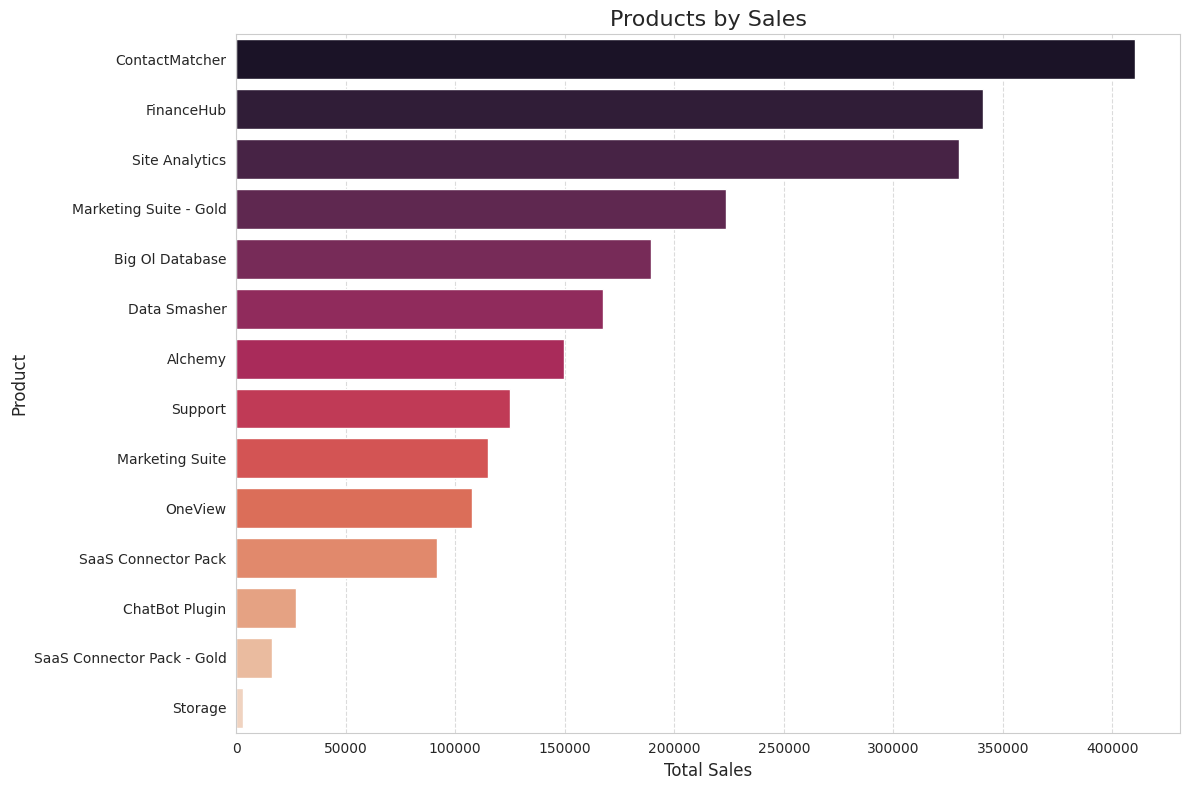

In [ ]:
top_products_sorted_new =  top_products.sort_values(by='Sales', ascending=False)
# Membuat grafik batang horizontal
plt.figure(figsize=(12, 8))
sb.barplot(x='Sales', y='Product', data=top_products_sorted_new, palette='rocket')
plt.title('Products by Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2966146778.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Profit', y='Product', data=top_products_sorted, palette='rocket')


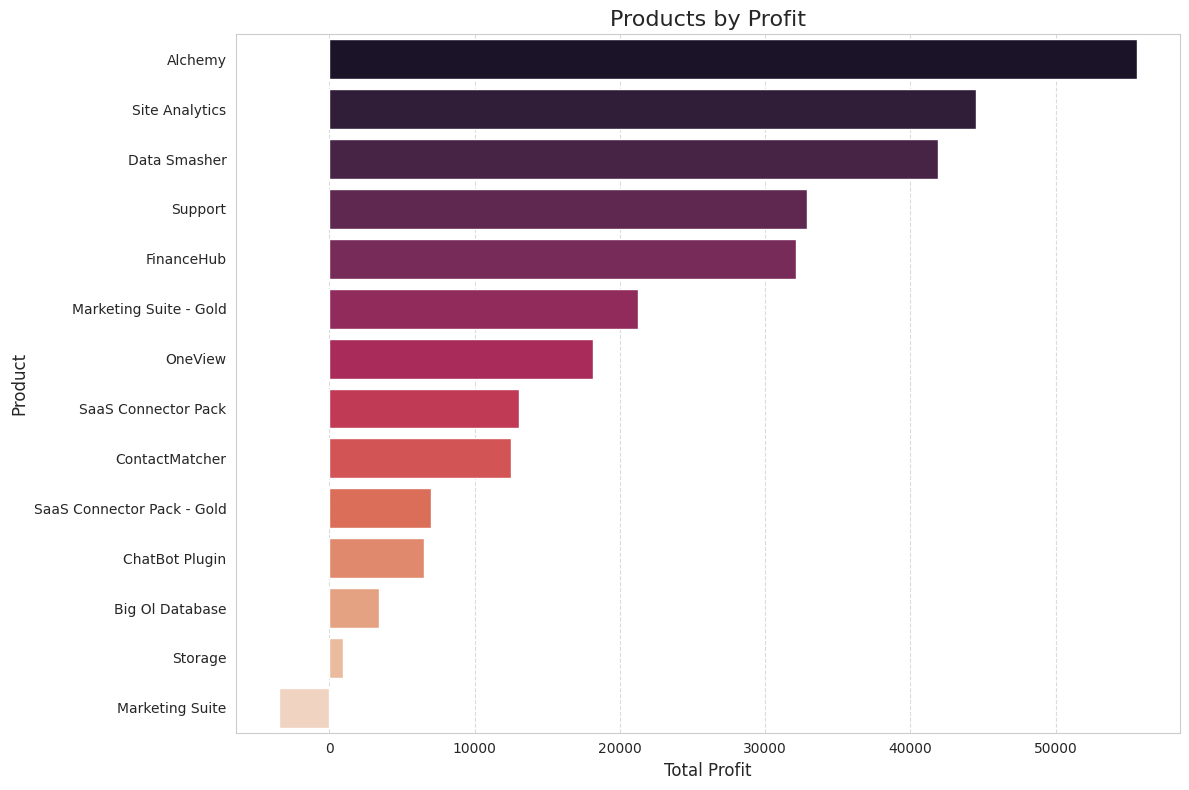

In [ ]:
# Membuat grafik batang horizontal
plt.figure(figsize=(12, 8))
sb.barplot(x='Profit', y='Product', data=top_products_sorted, palette='rocket')
plt.title('Products by Profit', fontsize=16)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#ANALISIS PRODUK SALES DAN PROFIT TERABANYAK PERTAHUN
df_Product_sales_peryear  = df.groupby(by=['Year','Product'])['Sales'].sum().reset_index()
df_Product_sales_peryear_sorted = df_Product_sales_peryear.sort_values(['Year','Sales'], ascending=[True,False])
top_2_df_Product_sales_peryear = df_Product_sales_peryear_sorted.groupby('Year').head(3).reset_index(drop=True)
top_2_df_Product_sales_peryear

,Year,Product,Sales
0,2020,ContactMatcher,89576.6305
1,2020,FinanceHub,80082.9700
2,2020,Site Analytics,77390.8060
3,2021,ContactMatcher,76603.5215
4,2021,FinanceHub,74690.9910
5,2021,Site Analytics,68313.7020
6,2022,ContactMatcher,110318.3815
7,2022,FinanceHub,86745.8850
8,2022,Site Analytics,78659.6540
9,2023,ContactMatcher,133879.7315


In [ ]:
df_Product_profit_peryear  = df.groupby(by=['Year','Product'])['Profit'].sum().reset_index()
df_Product_profit_peryear_sorted = df_Product_profit_peryear.sort_values(['Year','Profit'], ascending=[True,False])
top_2_df_Product_profit_peryear = df_Product_profit_peryear_sorted.groupby('Year').head(3).reset_index(drop=True)
top_2_df_Product_profit_peryear

,Year,Product,Profit
0,2020,Site Analytics,11808.0053
1,2020,FinanceHub,8241.0512
2,2020,Support,6861.0770
3,2021,Site Analytics,10398.8074
4,2021,Data Smasher,10197.2752
5,2021,Alchemy,9930.2988
6,2022,Alchemy,17742.7926
7,2022,Data Smasher,9664.2885
8,2022,Site Analytics,9436.9147
9,2023,Alchemy,25031.7902


Analisa Grafik di atas sebagai berikut:
1. Berdasarkan Grafik diatas dapat diketahui bahwa Produk 'ContactMatcher' memiliki volume penjualan tertinggi, namun produk 'Alchemy' dan 'Site Analytics' menunjukkan profit yang lebih signifikan. Ini mengindikasikan bahwa produk dengan penjualan tertinggi belum tentu yang paling menguntungkan.
2. Perusahaan juga harus memerhatikan produk Data Smasher dan Support karena biarpun berada di posisi 3 dan 4 tapi 2 produk ini memiliki profit margin tertinggi sebesar 25% dan 26%

3. Berdasarkan analsis tabel produk dari tahun ke tahun perusahaan dapat berfokus untuk mengembangkan produk ContactMatcher,Site Analytics, dan FinanceHub untuk tahun 2024 karena berdasarkan tabel di atas 3 produk ini selalu masuk dalam top 3 tertinggi untuk penjualan produk sedangan untuk produk yang paling menguntungkan perusahaan bisa berfokus mengembangkan produk Site Analytics,Data Smasher, dan Alchemy karena 3 produk ini sering sekali memasuki top 3 produk yang memiliki keuntungan tertinggi

# Tren Keuntungan dan Penjualan Berdasarkan wilayah
Kita harus mengetahui wilayah mana yang berkontribusi memberikan rata-rata (median) keuntungan yang terbesar dan produk mana yang mengalami penjualan tertinggi serta wilayah yang akan lebih difokuskan perusahaan untuk tahun berikutnya.

Karena data tidak berdistribusi normal maka menggunakan **median** untuk mencari nilai pusat

In [ ]:
sales_profit_per_region = df.groupby('Region')[['Sales', 'Profit']].median().reset_index()
sales_profit_per_region

,Region,Sales,Profit
0,AMER,60.340,10.9494
1,APJ,44.430,3.6956
2,EMEA,53.424,9.0720


In [ ]:
# Mengubah format data untuk grafik batang berkelompok (grouped bar chart)
sales_profit_per_region_melted = sales_profit_per_region.melt(id_vars='Region', var_name='Metric', value_name='Total Value')
sales_profit_per_region_melted

,Region,Metric,Total Value
0,AMER,Sales,60.3400
1,APJ,Sales,44.4300
2,EMEA,Sales,53.4240
3,AMER,Profit,10.9494
4,APJ,Profit,3.6956
5,EMEA,Profit,9.0720


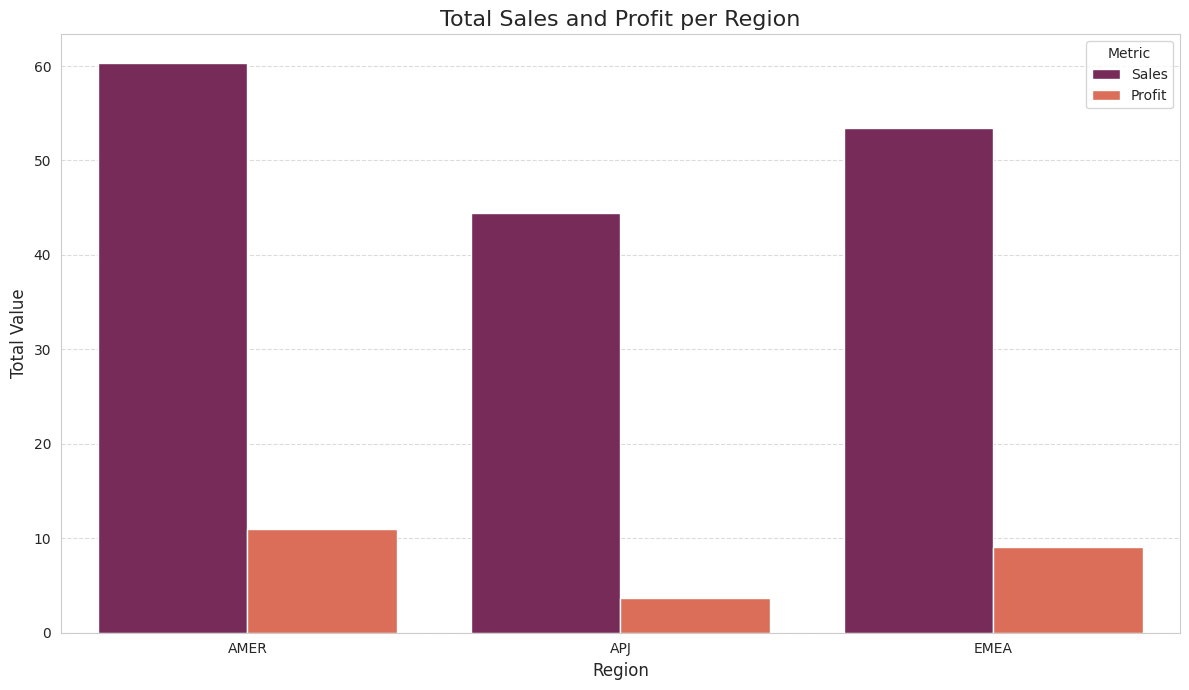

In [ ]:
# Membuat grafik batang berkelompok
plt.figure(figsize=(12, 7))
sb.barplot(x='Region', y='Total Value', hue='Metric', data=sales_profit_per_region_melted, palette='rocket')
plt.title('Total Sales and Profit per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Value', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
sales_profit_per_subregion = df.groupby(by=['Region','Subregion'])[['Sales', 'Profit']].median().reset_index()
sales_profit_per_subregion_AMER = sales_profit_per_subregion[sales_profit_per_subregion['Region']=='AMER']
sales_profit_per_subregion_AMER_sorted = sales_profit_per_subregion_AMER.sort_values(['Sales','Profit'], ascending=[False,False])
sales_profit_per_subregion_AMER_sorted

,Region,Subregion,Sales,Profit
1,AMER,NAMER,61.776,13.32000
0,AMER,LATAM,57.498,6.53775


In [ ]:
df_AMER  = df[df['Region']=='AMER']
df_AMER_NEW_sales = df_AMER.groupby(by=['Year','Product'])['Sales'].median().reset_index()
df_AMER__sales_sorted = df_AMER_NEW_sales.sort_values(['Year','Sales'], ascending=[True,False])
top_3_products_by_AMER_sales = df_AMER__sales_sorted.groupby('Year').head(3).reset_index(drop=True)
top_3_products_by_AMER_sales

,Year,Product,Sales
0,2020,Alchemy,929.9820
1,2020,Big Ol Database,567.1440
2,2020,Site Analytics,319.1840
3,2021,Big Ol Database,1188.0000
4,2021,Alchemy,1039.9840
5,2021,Marketing Suite,385.4155
6,2022,Alchemy,1199.9760
7,2022,Big Ol Database,558.4000
8,2022,Marketing Suite,273.6660
9,2023,Alchemy,899.9820


In [ ]:
df_AMER  = df[df['Region']=='AMER']
df_AMER_NEW_profit = df_AMER.groupby(by=['Year','Product'])['Profit'].median().reset_index()
df_AMER_profit_sorted = df_AMER_NEW_profit.sort_values(['Year','Profit'], ascending=[True,False])
top_3_products_by_AMER_profit = df_AMER_profit_sorted.groupby('Year').head(3).reset_index(drop=True)
top_3_products_by_AMER_profit

,Year,Product,Profit
0,2020,Alchemy,354.99315
1,2020,Big Ol Database,181.52200
2,2020,Site Analytics,31.49400
3,2021,Alchemy,280.49345
4,2021,Big Ol Database,41.88000
5,2021,OneView,30.49960
6,2022,Alchemy,374.99250
7,2022,Big Ol Database,62.82000
8,2022,Data Smasher,29.01625
9,2023,Alchemy,329.99400


Berdasarkan grafik di atas bahwa Wilayah AMER (Amerika) adalah kontributor rata-rata (median)penjualan dan profit terbesar. Diikuti oleh EMEA (Eropa, Timur Tengah, dan Afrika)dan APJ (Asia-Pasifik). Di dalam wilayah AMER, subwilayah NAMER (North America) mendominasi rata-rata penjualan dan profit terbesar.
Berdasarkan analisis tabel produk di wilayah AMER dari tahun ke tahun perusahaan dapat berfokus untuk mengembangkan produk Marketing Suite,Alchemy, dan Big Ol Database untuk tahun 2024  karena 3 produk ini sering sekali memasuki top 3 produk yang memiliki rata-rata penjualan tertinggi. Sedangkan untuk produk yang paling menguntungkan perusahaan bisa berfokus mengembangkan produk Data Smasher, Alchemy, dan Big Ol Database karena 3 produk ini sering sekali memasuki top 3 produk yang memiliki rata-rata keuntungan tertinggi.


In [ ]:
df_EMEA  = df[df['Region']=='EMEA']
df_EMEA_NEW_sales = df_EMEA.groupby(by=['Year','Product'])['Sales'].median().reset_index()
df_EMEA__sales_sorted = df_EMEA_NEW_sales.sort_values(['Year','Sales'], ascending=[True,False])
top_3_products_by_EMEA_sales = df_EMEA__sales_sorted.groupby('Year').head(3).reset_index(drop=True)
top_3_products_by_EMEA_sales


,Year,Product,Sales
0,2020,Big Ol Database,1060.645
1,2020,Alchemy,819.984
2,2020,Marketing Suite,353.568
3,2021,Big Ol Database,1035.800
4,2021,Alchemy,799.984
5,2021,Marketing Suite,449.568
6,2022,Alchemy,1549.935
7,2022,Big Ol Database,699.705
8,2022,Marketing Suite,346.744
9,2023,Alchemy,2199.965


In [ ]:
df_EMEA  = df[df['Region']=='EMEA']
df_EMEA_NEW_profit = df_EMEA.groupby(by=['Year','Product'])['Profit'].median().reset_index()
df_EMEA_profit_sorted = df_EMEA_NEW_profit.sort_values(['Year','Profit'], ascending=[True,False])
top_3_products_by_EMEA_profit = df_EMEA_profit_sorted.groupby('Year').head(3).reset_index(drop=True)
top_3_products_by_EMEA_profit

,Year,Product,Profit
0,2020,Alchemy,150.49735
1,2020,Site Analytics,52.63440
2,2020,Data Smasher,34.69830
3,2021,Big Ol Database,296.06710
4,2021,Alchemy,274.99500
5,2021,Site Analytics,31.19800
6,2022,Alchemy,600.97370
7,2022,Big Ol Database,88.95025
8,2022,OneView,33.57720
9,2023,Alchemy,1004.98400


Untuk meningkatkan penjualan dan keuntungan di wilayah EMEA perusahaan dapat berfokus untuk mengembangkan produk Marketing Suite,Alchemy, dan Big Ol Database untuk tahun 2024  karena 3 produk ini sering sekali memasuki top 3 produk yang memiliki rata-rata penjualan tertinggi. Sedangkan untuk produk yang paling menguntungkan perusahaan bisa berfokus mengembangkan produk Site Analytics, Alchemy, OneView, dan Big Ol Database	 karena 4 produk ini sering sekali memasuki top 3 produk yang memiliki rata-rata keuntungan tertinggi.

In [ ]:
df_APJ = df[df['Region']=='APJ']
df_APJ_NEW_sales = df_APJ .groupby(by=['Year','Product'])['Sales'].median().reset_index()
df_APJ__sales_sorted = df_APJ_NEW_sales.sort_values(['Year','Sales'], ascending=[True,False])
top_3_products_by_APJ_sales = df_APJ__sales_sorted.groupby('Year').head(3).reset_index(drop=True)
top_3_products_by_APJ_sales

,Year,Product,Sales
0,2020,Alchemy,1359.9680
1,2020,Big Ol Database,786.8800
2,2020,Marketing Suite,362.9400
3,2021,Alchemy,999.9800
4,2021,Big Ol Database,432.2550
5,2021,Marketing Suite,365.5796
6,2022,Alchemy,17499.9500
7,2022,Big Ol Database,1007.9790
8,2022,Marketing Suite,241.3320
9,2023,Alchemy,1199.9800


In [ ]:
df_APJ     = df[df['Region']=='APJ']
df_APJ_NEW_profit = df_APJ.groupby(by=['Year','Product'])['Profit'].median().reset_index()
df_APJ_profit_sorted = df_APJ_NEW_profit.sort_values(['Year','Profit'], ascending=[True,False])
top_3_products_by_APJ_profit = df_APJ_profit_sorted.groupby('Year').head(3).reset_index(drop=True)
top_3_products_by_APJ_profit

,Year,Product,Profit
0,2020,Alchemy,379.99150
1,2020,SaaS Connector Pack - Gold,23.98830
2,2020,Site Analytics,17.89305
3,2021,Alchemy,449.99100
4,2021,Big Ol Database,44.79405
5,2021,Site Analytics,38.77920
6,2022,Alchemy,8399.97600
7,2022,Site Analytics,35.92470
8,2022,Big Ol Database,33.58950
9,2023,Alchemy,467.99220


Untuk meningkatkan penjualan dan keuntungan di wilayah APJ perusahaan dapat berfokus untuk mengembangkan produk Marketing Suite,Alchemy, dan Big Ol Database untuk tahun 2024  karena 3 produk ini sering sekali memasuki top 3 produk yang memiliki rata-rata penjualan tertinggi. Sedangkan untuk produk yang paling menguntungkan perusahaan bisa berfokus mengembangkan produkSite Analytics, Alchemy, SaaS Connector Pack - Gold, dan Big Ol Database	 karena 4 produk ini sering sekali memasuki top 3 produk yang memiliki rata-rata keuntungan tertinggi.

# Tren Keuntungan dan Penjualan Berdasarkan Segment dan Industri
Kita harus mengetahui Segment dan Industri mana yang berkontribusi keuntungan yang terbesar dan produk mana yang mengalami penjualan tertinggi serta segemn yang akan lebih difokuskan perusahaan untuk tahun berikutnya.

In [ ]:
# Analisis Sales & Profit berdasarkan Segment
segment_performance = df.groupby('Segment').agg({'Sales': 'sum','Profit': 'sum'}).reset_index()
# Hitung Margin Profit (%)
segment_performance['Profit Margin (%)'] = (segment_performance['Profit'] / segment_performance['Sales']) * 100
segment_performance_sorted = segment_performance.sort_values(by='Profit', ascending=False)
segment_performance_sorted


,Segment,Sales,Profit,Profit Margin (%)
1,SMB,1.161401e+06,134119.2092,11.548050
2,Strategic,7.061464e+05,91979.1340,13.025506
0,Enterprise,4.296531e+05,60298.6785,14.034269


Text(0.5, 1.0, 'Perbandingan Proporsi Penjualan per Segment')

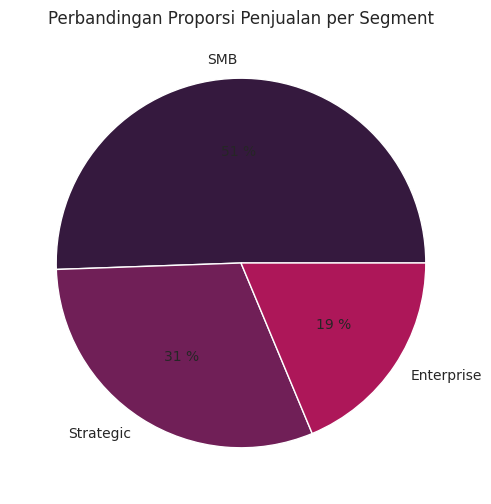

In [ ]:
colors = sb.color_palette('rocket')
plt.figure(figsize= (10, 6))
plt.pie(
    x= segment_performance_sorted['Sales'],
    labels= segment_performance_sorted['Segment'],
    colors=colors,
    autopct= "%.0f %%"
)
plt.title("Perbandingan Proporsi Penjualan per Segment")

In [ ]:
industri_sales = df[df['Segment']=='SMB']
industri_sales = df.groupby('Industry')['Sales'].sum().reset_index()
industri_sales.sort_values(by='Sales', ascending=False, inplace= True, ignore_index= True)
industri_sales

,Industry,Sales
0,Finance,474150.4844
1,Energy,304644.1409
2,Manufacturing,295192.3812
3,Healthcare,273183.2882
4,Tech,263169.0277
5,Consumer Products,224044.1422
6,Retail,223072.0720
7,Communications,120962.2365
8,Transportation,90191.3276
9,Misc,28591.7596


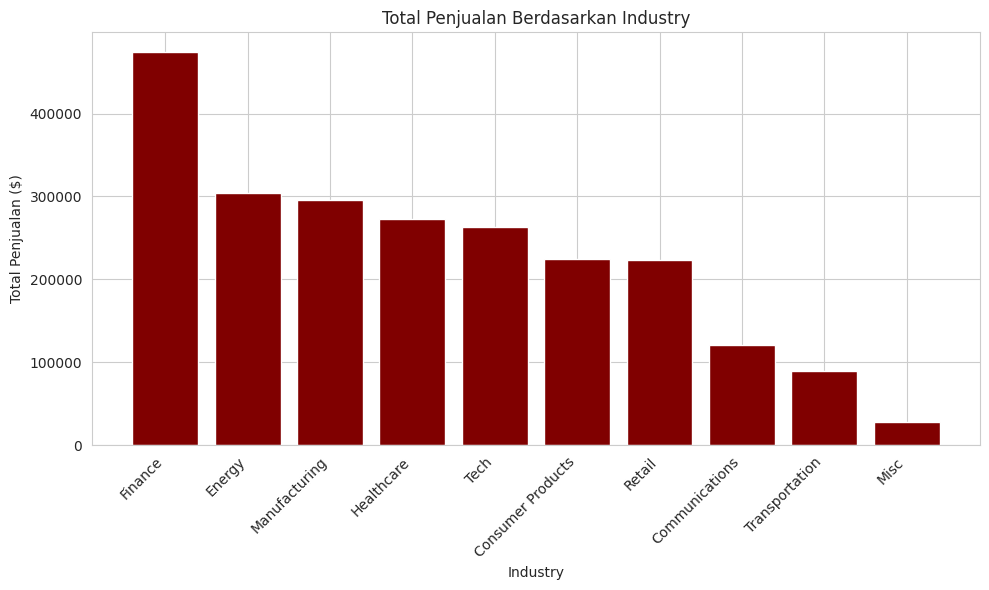

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(industri_sales['Industry'], industri_sales['Sales'], color='maroon')
plt.xlabel('Industry')
plt.ylabel('Total Penjualan ($)')
plt.title('Total Penjualan Berdasarkan Industry')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Perbandingan Proporsi Keuntungan per Segment')

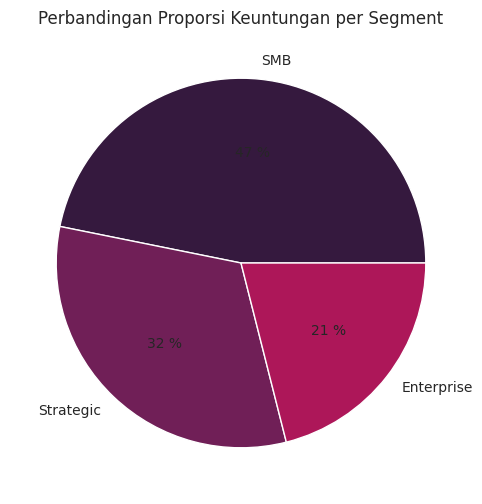

In [ ]:
plt.figure(figsize= (10, 6))
plt.pie(
    x= segment_performance_sorted['Profit'],
    labels= segment_performance_sorted['Segment'],
    colors=colors,
    autopct= "%.0f %%"
)
plt.title("Perbandingan Proporsi Keuntungan per Segment")

In [ ]:
industri_Profit = df[df['Profit']=='SMB']
industri_Profit = df.groupby('Industry')['Profit'].sum().reset_index()
industri_Profit.sort_values(by='Profit', ascending=False, inplace= True, ignore_index= True)
industri_Profit

,Industry,Profit
0,Finance,50348.9696
1,Energy,45282.3137
2,Manufacturing,38413.1064
3,Consumer Products,37018.0077
4,Healthcare,31969.0932
5,Retail,30207.8208
6,Tech,24615.0436
7,Communications,13976.3410
8,Transportation,7402.6967
9,Misc,7163.6290


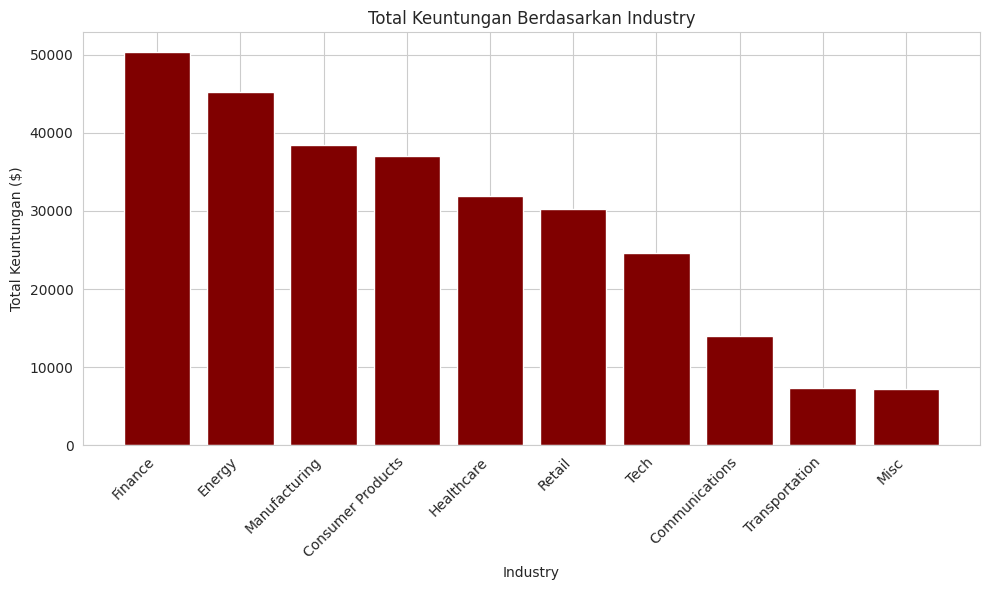

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(industri_Profit['Industry'], industri_Profit['Profit'], color='maroon')
plt.xlabel('Industry')
plt.ylabel('Total Keuntungan ($)')
plt.title('Total Keuntungan Berdasarkan Industry')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analisa data di atas sebagai berikut :
1. SMB (Small and Medium Business) adalah Segmen ini adalah segment penjualan tertinggi dan pemberi profit terbesar sebesar $134119. Namun, Margin Profit mereka yang 11.6% lebih rendah dari segmen Strategic. Ini menunjukkan model bisnis yang didorong oleh kuantitas dan sedikit margin yang lebih rendah.
2. Segmen Strategic ini menghasilkan Sales yang lebih rendah dari SMB, tetapi memiliki Profit Margin tertinggi secara signifikan sebesar 13%. Ini adalah segmen yang paling efisien dan menguntungkan per unit penjualan. Strategi harus fokus untuk memaksimalkan cross-selling dan upselling di segmen ini.
3. Segmen Enterprise memiliki volume Sales dan Profit terendah. Segmen ini  memerlukan perhatian khusus perusahaan karena bairpun sales dan profit terendah tapi profit marginnya tinggi.
4. Berdasarkan Grafik di atas segnen dengan penjualan dan keuntungan tertinggi adalah SMB (Small and Medium-sized Business) dari industri Finance disusul oleh Energy dan Manufacturing.

# Penjualan dan Keuntungan Berdasarkan Diskon

Berdasarkan data yang sudah kita analisis ditemukan bahwa ada keuntungan yang bernilai minus (rugi) dan produk yang memiliki nilai jual tertinggi bukan penyumpang keuntungan tertinggi juga. Setelah dianalisi salah satu faktornya adalah diskon karena sesuai dengan korelasi variabel yang sudah kita analisis ditemukan bahwa perbandingan korelasi antara variabel profit dan diskon sangat rendah.  

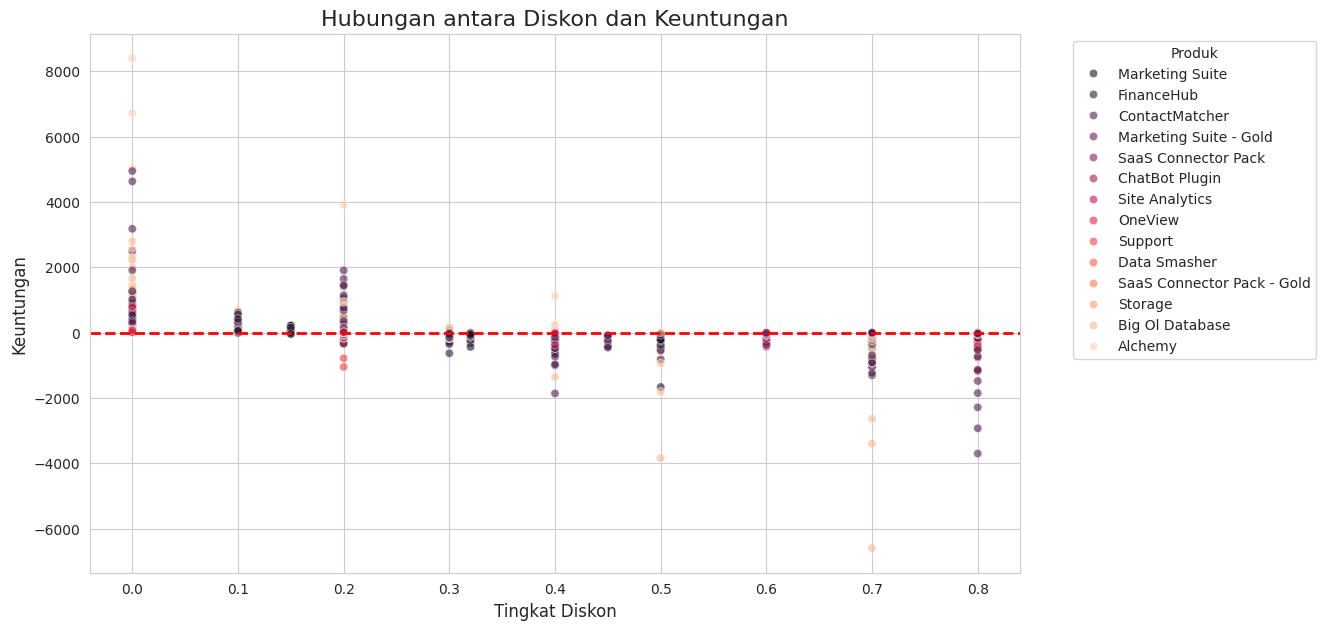

In [ ]:
plt.figure(figsize=(12, 7))
sb.scatterplot(x='Discount', y='Profit', data=df, hue='Product', palette='rocket', alpha=0.6)


plt.title('Hubungan antara Diskon dan Keuntungan', fontsize=16)
plt.xlabel('Tingkat Diskon', fontsize=12)
plt.ylabel('Keuntungan', fontsize=12)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.legend(title='Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

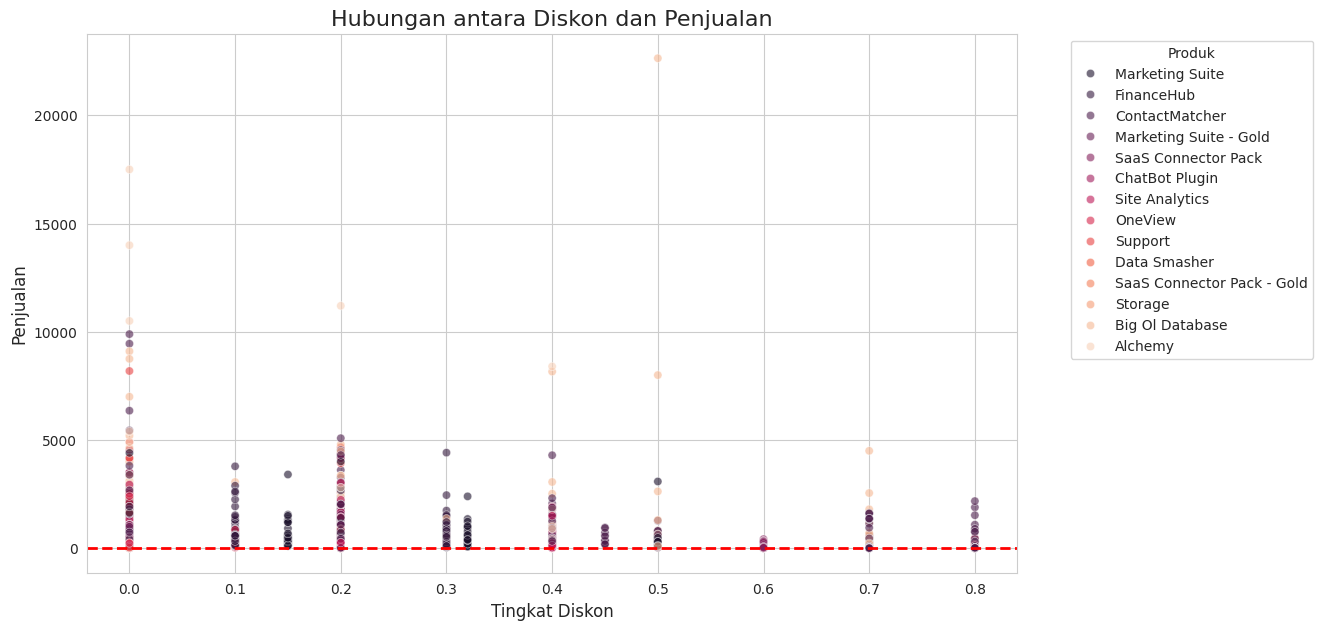

In [ ]:
plt.figure(figsize=(12, 7))
sb.scatterplot(x='Discount', y='Sales', data=df, hue='Product', palette='rocket', alpha=0.6)

plt.title('Hubungan antara Diskon dan Penjualan', fontsize=16)
plt.xlabel('Tingkat Diskon', fontsize=12)
plt.ylabel('Penjualan', fontsize=12)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.legend(title='Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Analisis menunjukkan korelasi negatif yang kuat antara diskon dan profit. Semakin besar diskon yang diberikan, semakin rendah profit yang dihasilkan, bahkan bisa merugi. Ini menjadi perhatian utama karena beberapa transaksi dengan diskon tinggi berakhir dengan kerugian.Analisis mendalam menunjukkan adanya hubungan yang signifikan antara diskon (discount) dan keuntungan (profit). Saat diskon diberikan, keuntungan rata-rata cenderung menurun secara drastis.Produk dengan diskon 0% memiliki keuntungan rata-rata tertinggi.Tingkat diskon yang kecil (10% dan 15%) masih menghasilkan keuntungan positif .Saat diskon naik menjadi 20-30%, keuntungan rata-rata per transaksi turun mendekati nol atau bahkan menjadi kerugian.Ada beberapa kasus di mana diskon besar (lebih dari 50%) diberikan, yang hampir selalu menyebabkan kerugian signifikan pada transaksi tersebut.Temuan ini mengindikasikan bahwa manajemen diskon perlu diperketat untuk menjaga profitabilitas, atau diskon harus diterapkan secara strategis pada produk dengan margin keuntungan tinggi.
Sedangkan untuk korelasi antra diskon dan penjualan sesuai dengan grafik di atas menunjukkan bahwa diskon yang diberikan tampaknya tidak memiliki dampak linier yang kuat terhadap jumlah Sales (Penjualan).

## Penjualan dan Keuntungan Berdasarkan Customer

In [ ]:
customer_profitability = df.groupby('Customer').agg({'Profit': 'sum','Sales': 'sum'}).reset_index()
top_10_profitable_customers = customer_profitability.sort_values(by='Profit',ascending=False).head(10)
top_10_profitable_customers.insert(0, 'Peringkat', range(1, 11))
top_10_profitable_customers

,Peringkat,Customer,Profit,Sales
92,1,Valero Energy,10308.6297,41220.4188
28,2,Coca-Cola,9449.0246,28643.8040
88,3,Trafigura Group,8867.8252,33447.1270
62,4,Mondelez International,8577.6524,32993.0458
55,5,Lowes,7937.4915,40360.1630
56,6,Lukoil,7117.0922,35199.1830
80,7,Siemens,6519.5105,36008.3686
16,8,Bank of America Corp.,6449.8554,41255.9471
54,9,Kroger,6256.1005,29783.4590
10,10,Anthem,5953.2038,55719.2100


Berdasarkan data di atas dapat kita ketahui top 10 customer yang paling menguntungkan perusahaan.Valero Energy adalah asset paling berharga bagi perusahaan. Valero Energy menyumbang keuntungan jauh lebih besar daripada pelanggan lain. Meskipun Valero Energy memiliki Profit absolut tertinggi, Coca-Cola memiliki Profit margin profit tinggi diantara 3 customer teratas. Ini mengindikasikan bahwa transaksi dengan Coca-Cola sangat bersih dari kerugian atau diskon berlebihan.Jadi, perusahaan dapat mengetahui customernya siapa dan dapat melakukan strategi khusus untuk mempertahankan customernya agar tetap loyal pada perusahaan

# KESIMPULAN DAN REKOMENDASI

##Kesimpulan
Dari analisis di atas dapat kita simpulkan bahwa:
1. Secara keseluruhan, bisnis menunjukkan tren pertumbuhan penjualan yang positif dan berkelanjutan sejak tahun 2022, menunjukkan keberhasilan dalam meningkatkan akuisisi atau retensi pelanggan.
Tren Profit menunjukkan bahwa, selain peningkatan volume penjualan, perusahaan juga berhasil meningkatkan efisiensi margin secara signifikan pada tahun 2023. Perusahaan semakin mahir dalam menjaga biaya atau mengalihkan penjualan ke produk dengan margin keuntungan lebih tinggi
2. Produk 'ContactMatcher' memiliki volume penjualan tertinggi, namun produk 'Alchemy' dan 'Site Analytics' menunjukkan profit yang lebih signifikan. Ini mengindikasikan bahwa produk dengan penjualan tertinggi belum tentu yang paling menguntungkan.
Perusahaan juga harus memerhatikan produk Data Smasher dan Support karena biarpun berada di posisi 3 dan 4 tapi 2 produk ini memiliki profit margin tertinggi sebesar 25% dan 26%
3. AMER adalah Regional yang paling dominan secara absolut. Subregion NAMER (Amerika Utara) menduduki puncak daftar sebagai penyumbang terbesar baik dalam penjualan maupun keuntungan.Perusahaan dapat berfokus untuk mengembangkan produk Marketing Suite,Alchemy, Data Smasher, dan Big Ol Database untuk tahun 2024.Wilayah EMEA (Eropa, Timur Tengah, dan Afrika) secara keseluruhan adalah kontributor profit terbesar kedua perusahaan dapat berfokus untuk mengembangkan produk Marketing Suite,Alchemy,Site Analytics OneView, dan Big Ol Database untuk tahun 2024.Sedangkan di posisi ketiga ada IPJ ,Marketing Suite,Alchemy, Site Analytics, SaaS Connector Pack - Gold dan Big Ol Database untuk tahun 2024  
4.  Segment SMB merupakan segmen yang paling menguntungkan dan memiliki penjualan tertinggi tetapi segment strategic memilik margin profit tertinggi. Industri Finance adalah konstribusi keuntungan tertinggi pada sektor SMB, perusahaan harus secara agresif menargetkan industri Energy dan Manufacturing karena mereka adalah top 3 teratas pada segmen SMB.
5. Transaksi Tanpa Diskon adalah Kunci Profit.Strategi penjualan harus dioptimalkan untuk memaksimalkan transaksi harga penuh (0.00). Hentikan Diskon > 20%. Gunakan diskon 10-15% secara sangat selektif dan bertarget (misalnya, untuk pelanggan yang hampir churn atau untuk mempercepat penutupan di akhir kuartal), tetapi jangan menjadikannya sebagai praktik standar
6. Valero Energy adalah customer yang paling menguntungkan. Meskipun Valero Energy memiliki Profit tertinggi, tetapi Coca-Cola memiliki Profit margin  tinggi diantara 3 customer teratas.

## Rekomendasi
1. Secara General:
  * Peluncuran produk baru.
  * Perubahan tim Sales atau kompensasi.
  * Fokus pada region atau segmen tertentu.

2. Berdasarkan analsis tabel produk dari tahun ke tahun aksi yang dapat dilakukan perusahaan sebagai berikut:
  * Perusahaan dapat mengalokasikan sumber daya Riset & Pengembangan (R&D) dan dukungan teknis terbaik untuk mengembangkan produk ContactMatcher,Site Analytics,Alchemy, Data Smasher dan FinanceHub untuk tahun 2024 karena beberapa produk ini adalah penyumbang keuntungan dan sebagai produk dengan penjualan terbesar dari tahun ke tahun. Tujuannya adalah memastikan produk ini tetap inovatif dan mempertahankan keunggulan yang memungkinkan pricing premium.
  *Pelajari dan dokumentasikan faktor-faktor yang mendorong margin tinggi produk ContactMatcher,Site Analytics,Alchemy, Data Smasher dan FinanceHub  (misalnya, biaya COGS yang rendah, harga yang tidak terpengaruh diskon). Replikasi praktik terbaik ini ke produk lain.
  * Gunakan Strategi Bundling misal memasukkan barang dengan profit  rendah pada penjualan produk dengan keuntungan dan penjualan tinggi

3. Lakukan forecasting dan manajemen risiko yang ketat di NAMER untuk memastikan pertumbuhan Profit yang stabil. Fokus pada perkembangan produk ContactMatcher,Site Analytics,Alchemy, Data Smasher dan FinanceHub di wilayah AMER. Mengaudit dan Mengoptimalkan Pasar Volume Rendah dan Margin Rendah (EMEA & APJ) dengan aksi yang direkomendasikan sebagai berikut:
  * Tinjau kembali struktur diskon seperti region dengan keuntungan yang rendah harus memiliki pembatasan diskon yang lebih ketat. Tinjau apakah diskon diterapkan terlalu longgar untuk mendapatkan volume. Jika ya, terapkan kebijakan "Hentikan Diskon di Atas 20%" secara ketat di wilayah tersebut.

  * Fokus pada Efisiensi Transaksi dengan cara dorong tim Sales di regian dengan profit rendah untuk menjual dalam kuantitas lebih besar per transaksi atau menggabungkan produk (bundle) untuk meningkatkan nilai rata-rata transaksi (AOV), yang seringkali membantu menutupi biaya operasional dasar.

4. Mengoptimalkan Segmen Strategic (Kualitas):
  * Fokus Sumber Daya seperti mengalokasikan tim  terbaik untuk Strategic Segment. Tujuan utama bukan hanya volume, tetapi peningkatan margin melalui upselling lisensi premium atau layanan konsultasi.

  * Monetisasi Nilai Tambah seperti mengembangkan dan pasarkan fitur atau layanan yang berbasis nilai, bukan harga. Karena margin mereka tinggi, segmen ini bersedia membayar untuk keunggulan dan kustomisasi.

  Meningkatkan Margin Segmen SMB (Kuantitas):

  * Produk Add-on: Kembangkan produk add-on atau bundle berbiaya rendah yang secara khusus menargetkan kebutuhan SMB, tetapi memiliki margin keuntungan tinggi. Ini akan menaikkan margin rata-rata SMB tanpa mengganggu volume.

  * Tingkatkan otomatisasi proses onboarding dan dukungan pelanggan di segmen SMB untuk menurunkan biaya operasional mereka, sehingga secara tidak langsung meningkatkan margin profit bersih yang berasal dari segmen ini.

5. Rekomendasi aksi untuk penjualan dan keuntungan berdasararkan diskon sebagai berikut:
  * Hentikan segera pemberian diskon di atas 20% dalam kebijakan penjualan
  * Fokuskan pemasaran dan pelatihan Sales pada nilai produk (Produk penjualan tinggi dibandling dengan produk penjualan rendah) alih-alih pada harga. Hal ini membenarkan harga penuh kepada pelanggan dan membantu tim Sales menghindari negosiasi diskon.
  * Diskon 10%–15% masih efektif dalam profit. Gunakan diskon 10%–15% secara eksklusif sebagai:
    * Diberikan hanya pada tahap akhir funnel penjualan untuk pelanggan yang ragu-ragu
    * Diberikan sebagai insentif pembaruan kontrak untuk pelanggan yang berisiko churn (berhenti berlangganan).
    * Tawarkan diskon 15% hanya jika pelanggan setuju untuk membeli bundle produk, memastikan diskon tersebut menaikkan Total Sales yang dikonversikan.

6. Strategi Retensi dan Pengembangan Pelanggan. Pelanggan Top 10 menyumbang bagian yang sangat besar dari total Profit. Mengamankan dan mengembangkan hubungan dengan mereka adalah kunci kesinambungan bisnis.
Aksi yang Direkomendasikan:
* Terapkan program "Pelanggan Strategis" seperti mereka harus menerima akun priotitas customer dan memberikan fasilitas yang lebih baik dari yang bukan memiliki akun priotitas customer
* Analisis produk apa yang dibeli oleh Top 10 ini. Jika mereka banyak membeli produk dengan profit, maka dorong mereka untuk mengadopsi produk terkait yang juga memiliki profit tinggi. Jika mereka membeli produk dengan profit rendah, maka kembangkan paket bundling yang mendorong mereka ke produk premium/margin tinggi.
* Lacak tingkat keterlibatan (engagement) dari Top 10 secara proaktif. Kehilangan satu dari mereka  dapat berdampak negatif yang lebih besar daripada kehilangan ratusan pelanggan kecil.